# Prueba de Gmmhmm y fuzzy clustering basada en datos sin transformation, pca y  factor   

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/davidrendon/Documents/SUP/GMMHMM'

In [4]:
d = pd.read_csv("entrenamiento.csv")
d.head()
d

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,target
0,0.881962,1.379585,0.686409,0.373569,0.780667,-0.995664,0.102277,-0.442452,0.138900,-0.164821,...,-0.582862,-0.308798,-0.926150,-0.331057,-0.084834,-0.863395,-1.828042,-2.117518,-2.407747,1
1,1.022423,1.613610,1.378754,0.689791,0.740971,-0.858666,0.272442,-0.274770,0.139990,-0.145246,...,-0.679741,0.243078,-0.736514,-0.277029,-0.368561,-0.961068,-1.967073,-2.226737,-2.740342,1
2,1.111161,1.282333,1.501813,0.635879,0.750587,-1.359903,0.467130,0.044668,0.142089,-0.047032,...,-0.596137,0.282601,-0.416820,-0.122728,-0.193827,-0.809835,-2.247025,-2.729378,-2.948249,1
3,1.668050,1.371015,1.627049,1.026570,0.600144,-1.692530,0.609323,0.375187,0.159901,0.208658,...,-1.063291,0.153703,-0.902967,-0.663794,-0.948217,-1.586745,-2.645995,-2.926667,-3.717506,1
4,1.357598,1.473565,1.291146,0.762733,0.703073,-1.255721,0.266256,0.170234,0.145432,0.152065,...,-0.913720,0.131137,-0.725502,-0.514248,-0.349673,-1.012663,-2.140703,-2.623220,-3.301840,1
5,0.905797,0.861637,1.787185,0.447647,0.695667,-0.801247,0.208916,0.359859,0.147579,-0.160075,...,-1.132920,-0.025192,-0.426588,-0.304547,-0.236008,-0.636994,-1.884550,-2.252556,-2.769677,1
6,1.202490,1.047119,1.583002,0.583866,0.678248,-1.463120,0.324411,0.485710,0.151495,0.056349,...,-1.098153,0.252646,-0.167642,-0.062752,-0.101029,-0.908189,-2.261685,-2.885601,-3.193474,1
7,0.664333,1.155844,0.474020,0.661938,0.665448,-1.891036,0.642821,0.180841,0.144063,0.061344,...,-1.298227,-0.082736,-0.192406,-0.351406,-0.629703,-1.561908,-2.682682,-2.908726,-3.171734,1
8,0.992875,1.430425,0.539385,0.982857,0.549246,-2.273232,0.889152,0.074897,0.158924,0.224183,...,-1.124546,0.152552,-0.033079,-0.201373,-0.605859,-1.198801,-2.783476,-3.429045,-3.673259,1
9,1.409782,0.854388,1.372721,0.479492,0.632554,-2.046287,0.608745,0.274088,0.150197,0.053015,...,-1.829067,-0.082485,-0.213239,-0.003669,-0.194429,-0.929000,-2.715264,-3.459791,-3.414935,1


In [5]:
prueba = pd.read_csv("prueba.csv")
prueba.head()
ypruebaP=prueba["Permanencia"]  ## this is the label 
ypruebaT=prueba["Transformación"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaP=[trans[item] for item in ypruebaP]
ypruebaT=[trans[item] for item in ypruebaT]
pruebaw=prueba.iloc[:,6:] #x without transformation
listnames=list(pruebaw.columns)  ##Columns names
pruebaw.head()
ypruebaT
pruebaw

KeyError: 'Permanencia'

In [49]:
prueba = pd.read_csv("prueba.csv")
prueba.head()
ypruebaP=prueba["target"]  ## this is the label 
prueba=prueba.drop('target',1)
prueba

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.967779,0.721609,0.826369,0.788970,0.669386,0.204866,-0.093365,-0.040794,0.165461,-0.137948,...,-1.193796,-0.973300,0.158244,-0.246942,-0.069376,0.302392,0.218393,-1.086051,-1.240672,-1.706252
1,0.344090,0.724196,1.083848,0.397346,0.725761,-0.710576,-0.362875,0.137747,0.147016,-0.445538,...,-0.993285,-0.361666,0.204833,-0.837582,-0.641988,-0.254816,-0.379260,-1.062085,-1.581943,-1.785024
2,-0.454469,0.499917,-0.004478,-0.224324,0.756357,-0.524987,-0.453335,-0.404264,0.138736,-0.402206,...,-1.114778,-0.406119,-0.116920,-0.775570,-0.753093,-0.081520,-0.047442,-0.668618,-1.066334,-1.383000
3,0.098645,1.036602,-0.109499,0.782767,0.892129,0.763235,0.432294,-0.701777,0.152574,-0.649054,...,0.455753,-0.494340,0.115746,-1.641030,-1.689385,-0.945562,-0.857493,-1.499750,-0.505977,-0.667956
4,0.382637,-0.272463,0.588883,1.308051,0.003683,-0.021581,0.644711,1.869662,-1.116420,0.031687,...,-2.994605,-2.034215,-1.796524,-1.041388,-0.212969,0.294012,0.103499,-0.091376,-0.624228,-0.321369
5,-0.525288,0.094580,-0.708874,1.180686,0.855760,0.660418,0.289622,0.215671,0.165124,-0.462635,...,0.627818,0.708868,0.963987,-0.570432,-0.688682,-0.226930,0.221637,-0.154145,0.244069,0.375437
6,-0.193306,-1.352237,-0.877832,-0.357473,-0.223340,0.300228,-0.239023,-0.268398,-1.196788,-0.587692,...,-0.293518,0.077899,0.589451,-0.249145,-0.273430,-0.084927,-0.343678,0.118776,0.012453,0.271644
7,-0.375900,0.114782,-0.526121,-0.264151,0.237836,0.401779,-0.044387,-0.368879,-1.230743,-0.751450,...,-0.485850,-0.437192,0.114116,-0.774177,-1.367703,-0.777009,-0.805050,-0.044871,0.152163,0.264317
8,-0.308156,0.068511,-0.669859,0.332230,0.052234,0.220780,-0.150450,0.475695,-1.218440,-0.601170,...,-0.506682,-0.141881,0.227449,-0.997138,-1.313531,-0.829717,-0.556271,-0.016804,-0.136467,0.219988
9,-0.079015,0.024963,-0.047641,1.319694,-0.536232,0.042764,1.195381,0.401025,-1.142759,-0.036283,...,-1.356096,-1.482856,-0.116152,-1.960741,-2.808610,-1.937638,-2.478580,-1.538678,-0.954723,-0.998196


In [7]:
d.describe()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,target
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.229400,-0.149658,-0.138031,0.364666,0.282586,-0.037041,0.167564,0.329218,-0.550490,-0.152753,...,-0.254587,0.045502,-0.267144,-0.226539,-0.117628,-0.123657,-0.398874,-0.473469,-0.395830,1.626866
std,1.166528,0.883180,0.950716,0.775342,0.515795,0.902662,0.612588,0.989575,0.636343,0.618348,...,0.941653,0.933207,0.885275,0.883349,0.816067,0.908636,1.069022,1.173699,1.284973,0.755501
min,-3.632750,-2.110405,-2.752318,-1.732688,-0.801856,-2.273232,-1.576113,-0.855829,-1.260223,-0.780841,...,-1.829067,-1.612970,-1.821592,-2.425724,-2.052413,-1.842752,-2.783476,-3.459791,-3.717506,1.000000
25%,-0.457114,-0.789189,-0.724965,-0.009291,-0.168785,-0.700480,-0.109064,-0.383781,-1.120541,-0.537675,...,-0.953884,-0.697802,-0.884937,-0.663219,-0.579236,-0.653204,-0.956004,-0.954606,-0.738886,1.000000
50%,-0.135157,-0.130418,-0.346401,0.404749,0.355978,0.160173,0.272442,0.170234,-0.930829,-0.293544,...,-0.582862,0.141924,-0.439920,-0.295586,-0.236008,-0.158473,-0.324976,-0.297489,-0.021906,1.000000
75%,1.061355,0.489272,0.596538,0.780750,0.764901,0.518919,0.590415,0.556504,0.153050,0.013044,...,0.379353,0.612893,0.023657,-0.008072,0.245582,0.337072,0.345594,0.293574,0.416471,2.000000
max,3.145898,1.613610,1.787185,2.432540,0.906231,1.837181,1.546773,3.325533,0.553378,1.899988,...,1.795126,1.920779,1.977387,1.805823,1.672063,2.101931,1.598623,1.344011,1.350693,3.000000


In [8]:
yp=d["target"]  ## this is the label 
d=d.drop('target',1)
#yt=d["Transformación"]
d.head()
#trans={'Alta':2,'Baja':0,'Media':1}
#yt=[trans[item] for item in yt]
xw=d

In [11]:
xw=d.iloc[:,6:] #x without transformation
listnames=list(xw.columns)  ##Columns names


In [9]:
x= StandardScaler().fit_transform(xw.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=xw.index,columns=xw.columns) #so we need to transform it 
scalx.head()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.563628,1.744588,0.873723,0.011568,0.972944,-1.070010,-0.107380,-0.785684,1.091538,-0.019665,...,-0.272487,-0.351247,-0.382524,-0.750027,-0.119213,0.040488,-0.820264,-1.346984,-1.411314,-1.577544
1,0.684946,2.011568,1.607456,0.422494,0.895402,-0.917094,0.172497,-0.614957,1.093265,0.012232,...,-0.222967,-0.454905,0.213315,-0.534199,-0.057588,-0.309812,-0.928569,-1.478019,-1.505071,-1.838332
2,0.761590,1.633641,1.737871,0.352437,0.914186,-1.476573,0.492709,-0.289718,1.096589,0.172264,...,0.026921,-0.365451,0.255986,-0.170349,0.118407,-0.094078,-0.760873,-1.741872,-1.936558,-2.001351
3,1.242583,1.734811,1.870593,0.860135,0.620313,-1.847849,0.726580,0.046804,1.124790,0.588890,...,-0.527461,-0.865294,0.116820,-0.723642,-0.498732,-1.025477,-1.622355,-2.117899,-2.105918,-2.604525
4,0.974442,1.851802,1.514611,0.517282,0.821373,-1.360285,0.162322,-0.161871,1.101882,0.496675,...,-0.402072,-0.705257,0.092456,-0.521666,-0.328160,-0.286492,-0.985780,-1.641665,-1.845428,-2.278602


# Correlation matrix


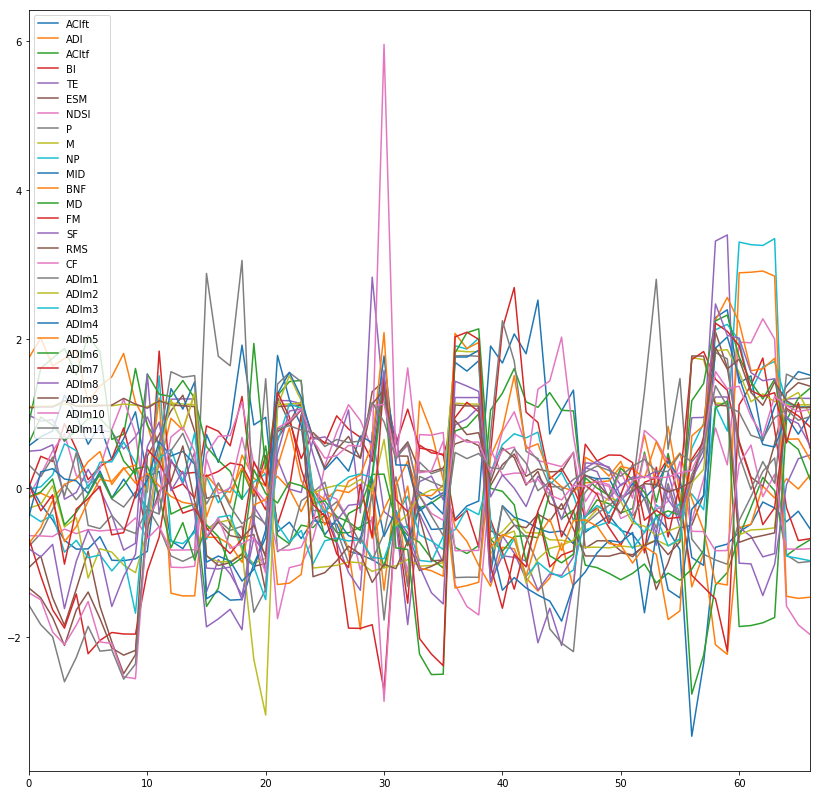

In [579]:
scalx.plot(figsize = (14,14)) ;


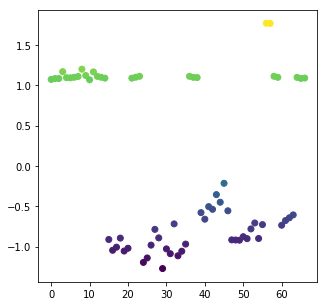

In [597]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
x=np.arange(d.shape[0])
y=scalx.RMS
img = ax.scatter(x, y, c=scalx.RMS, cmap=plt.viridis())

plt.show()

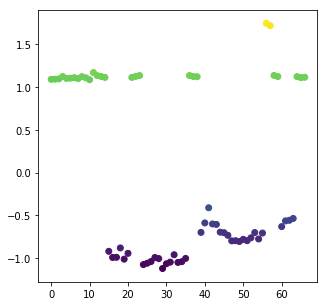

In [599]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
x=np.arange(d.shape[0])
y=scalx.M
img = ax.scatter(x, y, c=scalx.M, cmap=plt.viridis())

plt.show()

In [ ]:
M y RMS tienen 99 porciento de correlacin

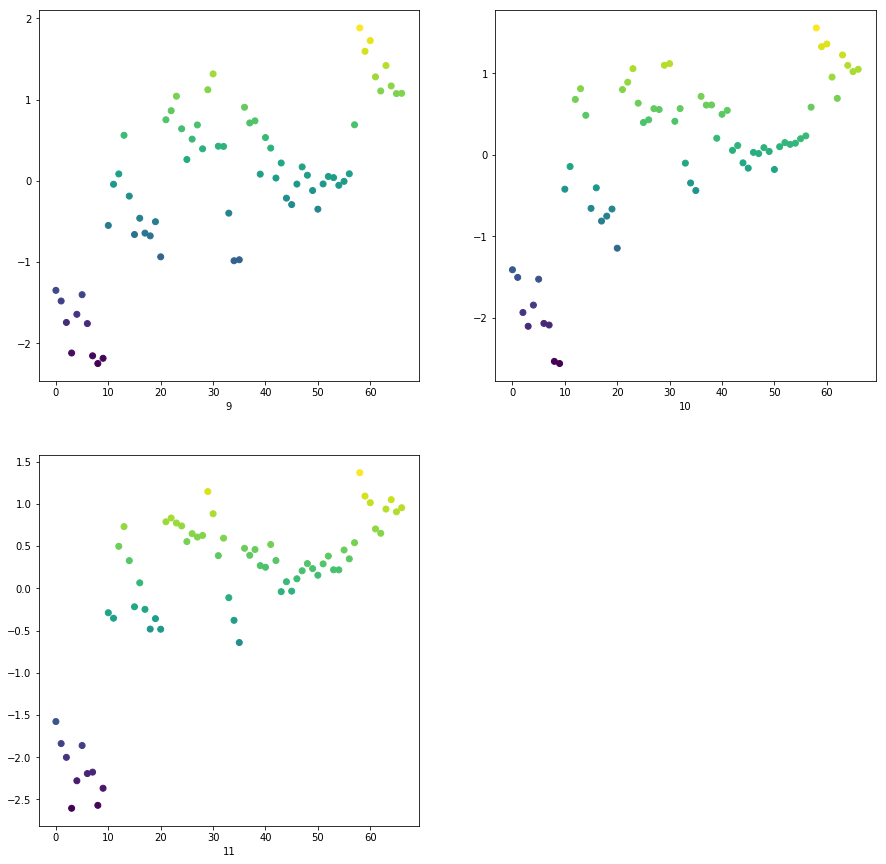

In [603]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y9=scalx.ADIm9
img = ax.scatter(x, y9, c=y9, cmap=plt.viridis())
y10=scalx.ADIm10
axx = fig.add_subplot(2,2,2)
img = axx.scatter(x, y10, c=y10, cmap=plt.viridis())
y11=scalx.ADIm11
axxx = fig.add_subplot(2,2,3)
img = axxx.scatter(x, y11, c=y11, cmap=plt.viridis())
ax.set_xlabel('9')
axx.set_xlabel('10')
axxx.set_xlabel('11')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f007a91fc88>,
      dtype=object)

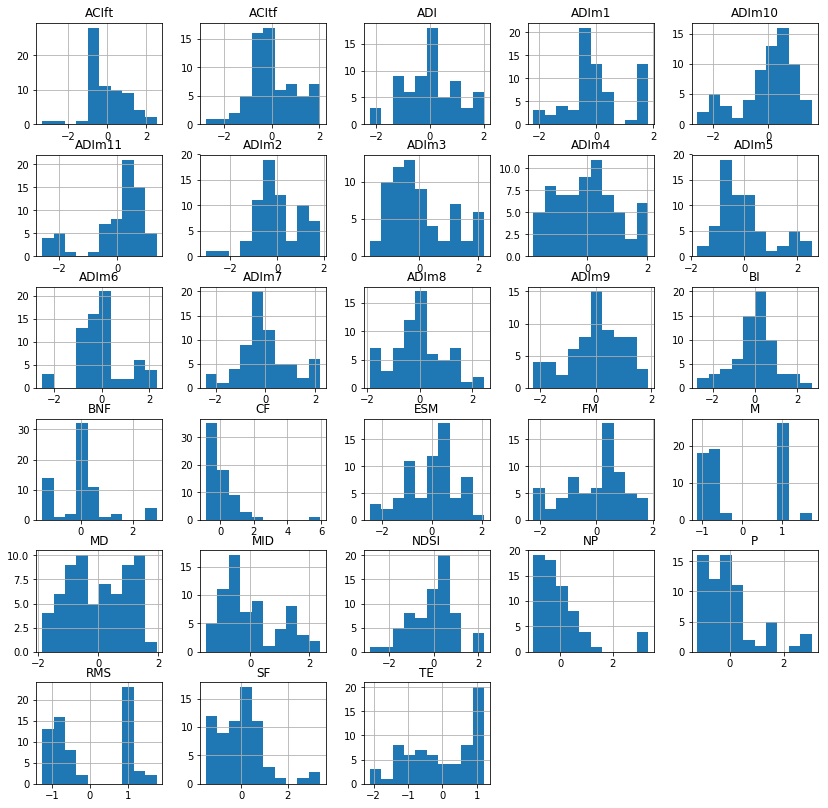

In [521]:
scalx.hist(figsize = (14,14)) 


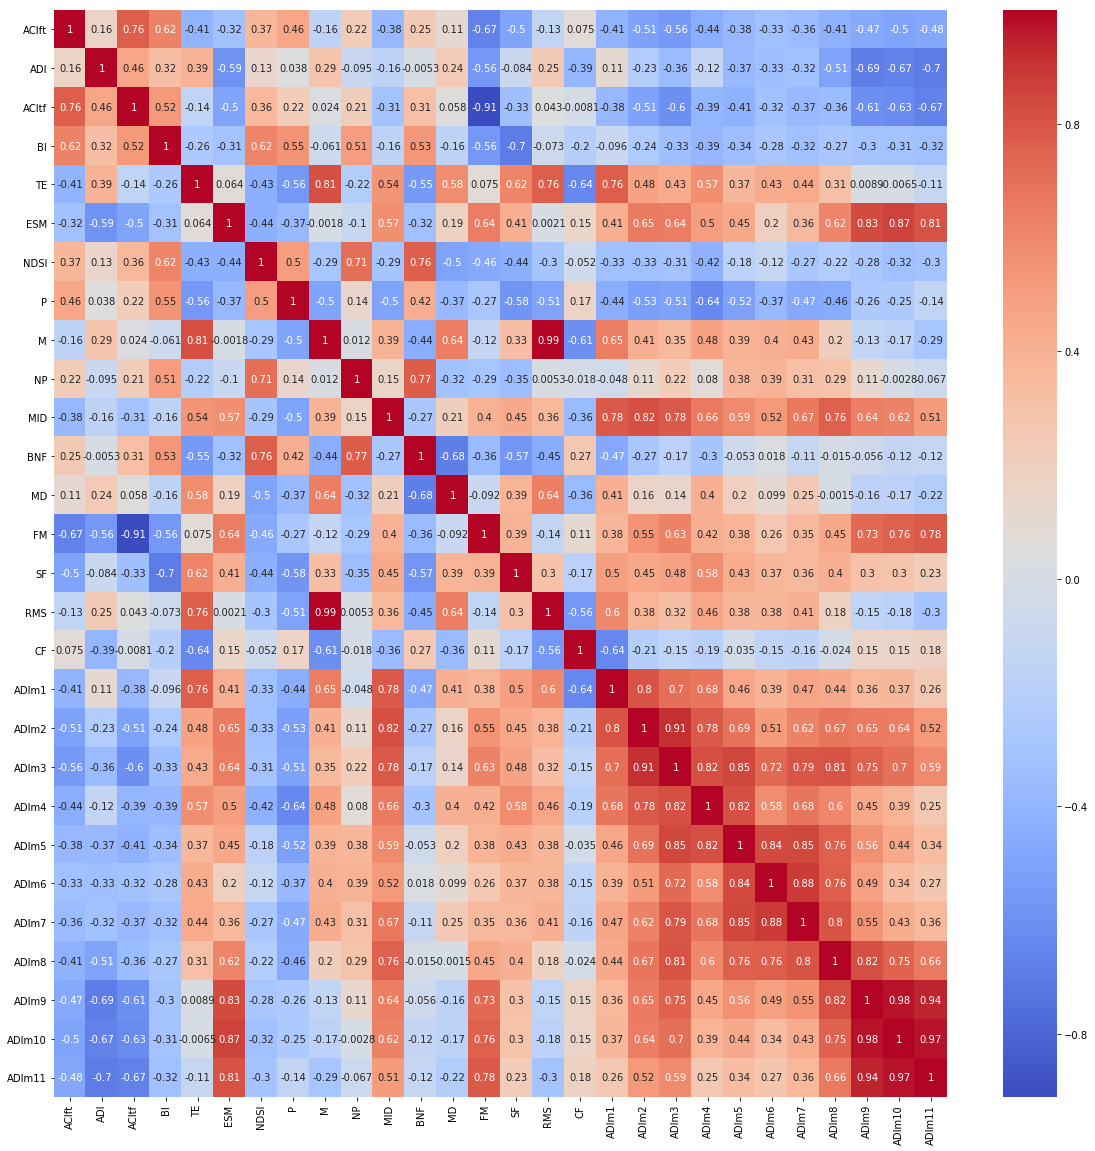

In [522]:
d=scalx
#d = d.drop('BNT', 1)

plt.figure(figsize=(20, 20))
sns.heatmap(d.corr(), annot = True, cmap = 'coolwarm')

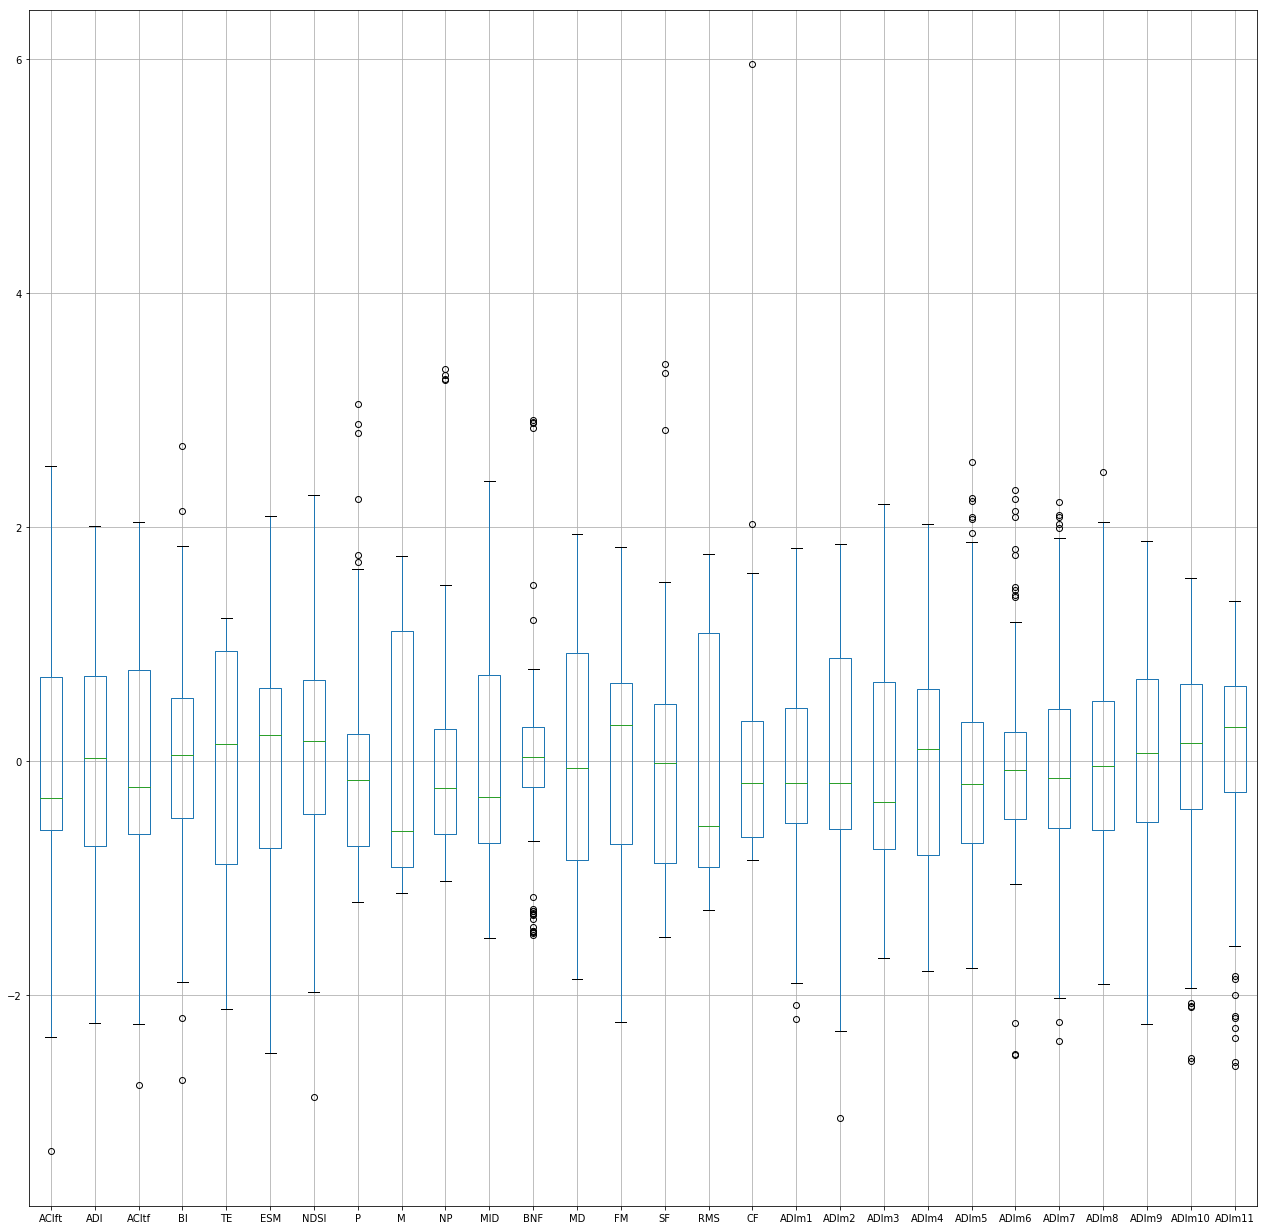

In [136]:
d.boxplot(figsize = (22,22))

# Deteccion de outliers

In [179]:
import numpy as np
import matplotlib.pyplot as plt
anomalies = []

# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    #print(lower_limit)
    # Generate outliers
    anomalies = []
    for index, outlier in enumerate(random_data):
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            print("esta en la posicion",index)
    return anomalies
find_anomalies(d.CF)

esta en la posicion 52


[5.952783235914422]

In [180]:
d.CF[52]

5.952783235914422

In [181]:
d.columns[1]

'ADI'

In [183]:
for index ,i in enumerate(d.columns):
    print("los outliers en",d.columns[index])
    print(find_anomalies(d.iloc[:,index]))

los outliers en ACIft
esta en la posicion 12
[-3.3357962474971314]
los outliers en ADI
[]
los outliers en ACItf
[]
los outliers en BI
[]
los outliers en TE
[]
los outliers en ESM
[]
los outliers en NDSI
[]
los outliers en P
esta en la posicion 25
[3.0507322737681846]
los outliers en M
[]
los outliers en NP
esta en la posicion 28
esta en la posicion 29
esta en la posicion 30
esta en la posicion 31
[3.298510832242928, 3.2633409075021222, 3.2524870892882456, 3.344773411525442]
los outliers en MID
[]
los outliers en BNF
[]
los outliers en MD
[]
los outliers en FM
[]
los outliers en SF
esta en la posicion 20
esta en la posicion 21
[3.3116338401273016, 3.393879391945356]
los outliers en RMS
[]
los outliers en CF
esta en la posicion 52
[5.952783235914422]
los outliers en ADIm1
[]
los outliers en ADIm2
esta en la posicion 27
[-3.0514438139279756]
los outliers en ADIm3
[]
los outliers en ADIm4
[]
los outliers en ADIm5
[]
los outliers en ADIm6
[]
los outliers en ADIm7
[]
los outliers en ADIm8
[]

In [191]:
d.mean();

In [192]:
##Creo una nueva db que tendra los datos sin outliers
dwitouliers=d
#y reemplazo los outliers por la media del vector 
#dwitouliers.ACIft[12]=d.ACIft.mean()
#dwitouliers.P[25]=d.P.mean()
dwitouliers.NP[28]=d.NP.mean()
dwitouliers.NP[29]=d.NP.mean()
dwitouliers.NP[30]=d.NP.mean()
dwitouliers.NP[31]=d.NP.mean()
dwitouliers.SF[20]=d.SF.mean()
dwitouliers.SF[21]=d.SF.mean()
dwitouliers.CF[52]=d.CF.mean()
dwitouliers.ADIm2[27]=d.ADIm2.mean()


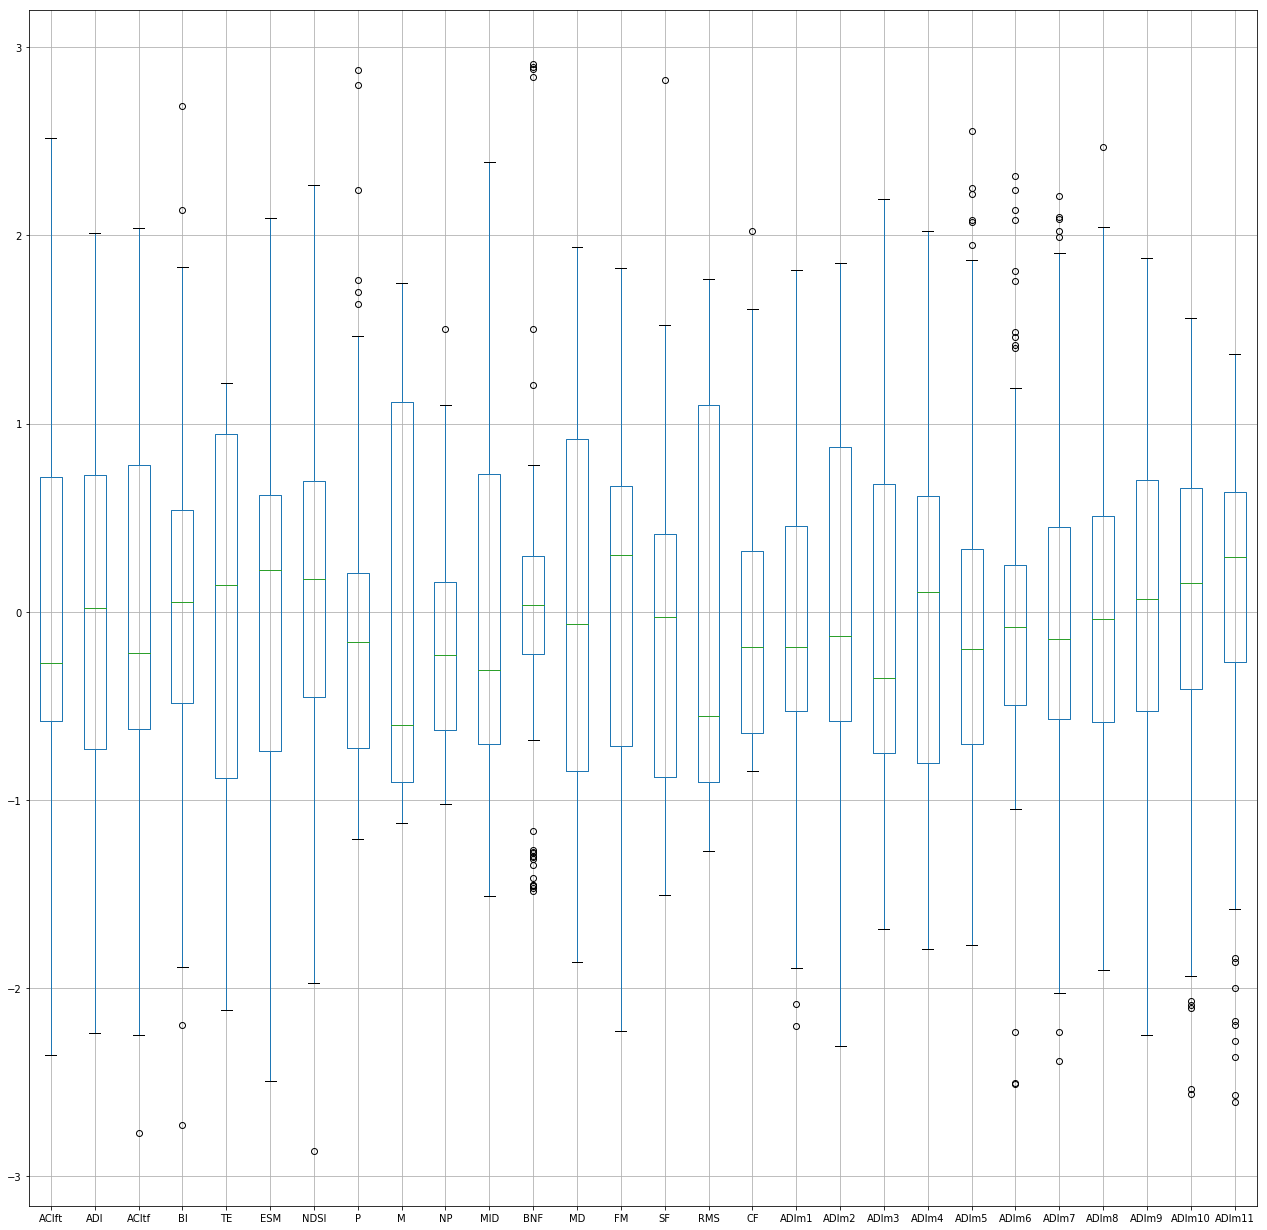

In [193]:
dwitouliers.boxplot(figsize = (22,22))

 # PCA

In [195]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(scalx)

principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape


(67, 4)

In [197]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(dwitouliers)

principalDfwitouliers = pd.DataFrame(data = principalComponents)
principalDfwitouliers.shape


(67, 4)

In [14]:

finalDf = pd.concat([principalDf, d[['Permanencia']]], axis = 1)
finalDf.shape

(67, 5)

In [15]:
import pandas as pd
from sklearn import decomposition, preprocessing

df=xw

pca_data = preprocessing.scale(df)

pca = decomposition.PCA(n_components = 4)
pca.fit(pca_data)
transformed_pca = pca.transform(pca_data)

cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)  ##var acumulative

[0.4180139779089015, 0.61719504498475, 0.7455544091904734, 0.8047363667732776]


/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [16]:
principalDf = pd.DataFrame(data = transformed_pca)
finalDf = pd.concat([principalDf, d[['Permanencia']]], axis = 1) ###
pca.explained_variance_ratio_
#finalDf
#principalDf

array([0.41801398, 0.19918107, 0.12835936, 0.05918196])

# pruebas de normalidad

In [17]:
from scipy import stats
kolmogorov=[]
for i in range(0,29):
 kolmogorov.append(stats.kstest(scalx.iloc[:,i], 'norm').pvalue)

In [18]:
type(kolmogorov)
#kolmogorov

list

In [19]:
shapi=[]
for i in range(0,29):
 shapi.append(stats.shapiro(df.iloc[:,i]))
#shapi

/home/davidrendon/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Analisis factorial

In [20]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=4, random_state=0)
X_transformed = transformer.fit_transform(xw)
X_transformed;


In [21]:
principalf = pd.DataFrame(data = X_transformed)
finalf = pd.concat([principalf, d[['Permanencia']]], axis = 1)
finalf=finalDf.rename(columns={'Permanencia':'target'});


In [22]:
trans={'Alta':2,'Baja':0,'Media':1}
finalf.target=[trans[item] for item in finalf.target]

In [25]:
finalf.target;


# Graficas de los datos

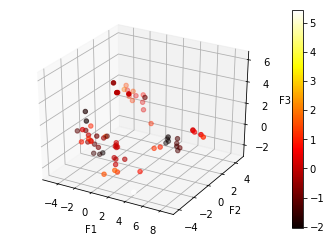

In [26]:
##Grafica de los datos con Factor

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

features=finalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
plt.show()

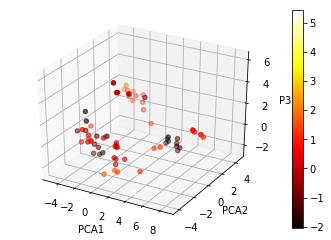

In [27]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

# Grafica de los grupos

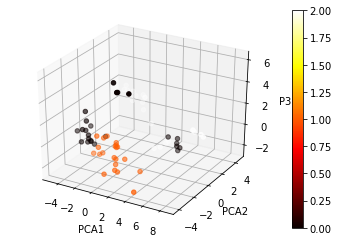

In [30]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=yt, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

In [532]:
yp[19]

1

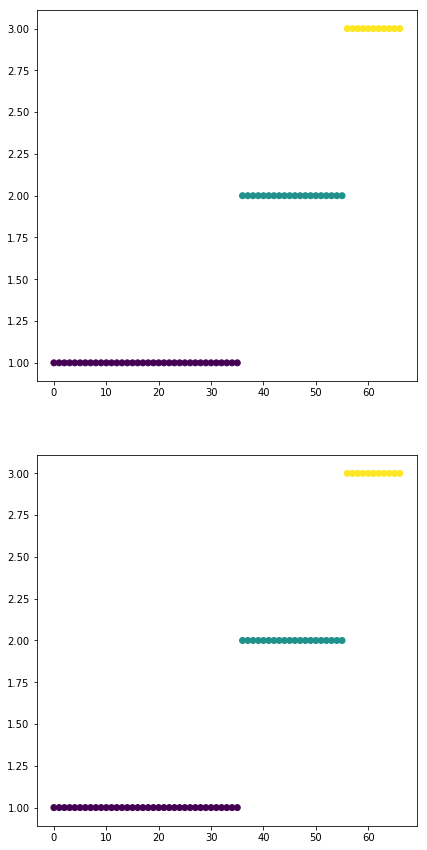

In [566]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y=yp
img = ax.scatter(x, y, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y, c=yp, cmap=plt.viridis())
plt.show()

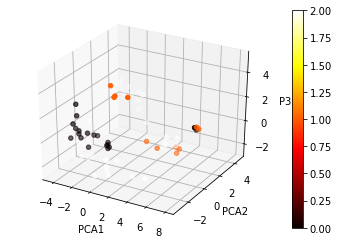

,0,1,2,3
0,-1.626040,3.766856,-0.222426,0.191408
1,-2.142818,4.237366,0.211681,0.018135
2,-2.318485,4.541456,0.797331,0.444994
3,-4.342542,4.633429,0.760697,0.051816
4,-3.013076,4.377018,0.571460,0.143864
5,-2.980487,3.809791,0.614005,0.878736
6,-3.247970,4.283453,1.206391,1.216067
7,-3.769576,4.256396,0.522535,1.110624
8,-4.217164,4.426925,1.474685,1.345153
9,-4.239861,4.174272,1.339593,1.772283


In [504]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=finalf.target, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()
principalDfwitouliers

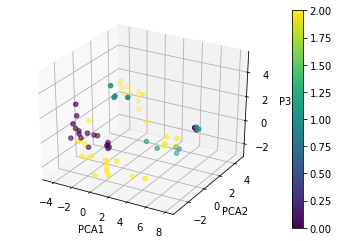

In [205]:
features= principalDfwitouliers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=finalf.target, cmap=plt.viridis())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

# K-means

In [659]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-20) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(finalf.target,y_kmeans)
    
accuracyxw  


array([0.        , 0.34328358, 0.1641791 , 0.49253731, 0.41791045,
       0.41791045, 0.19402985, 0.3880597 , 0.41791045, 0.19402985,
       0.41791045, 0.41791045, 0.34328358, 0.19402985, 0.19402985,
       0.1641791 , 0.34328358, 0.49253731, 0.49253731, 0.34328358])

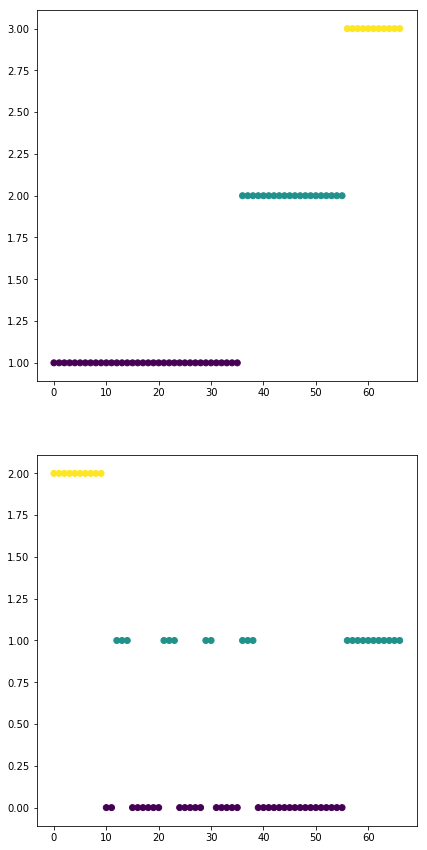

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [660]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y=yp
img = ax.scatter(x, y, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y_kmeans, c=y_kmeans, cmap=plt.viridis())
plt.show()

y_kmeans

In [537]:

kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-20) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalDfwitouliers)
    y_kmeans = kmeans.predict(principalDfwitouliers)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.55223881, 0.55223881, 0.1641791 , 0.53731343,
       0.1641791 , 0.55223881, 0.55223881, 0.35820896, 0.55223881,
       0.35820896, 0.55223881, 0.58208955, 0.35820896, 0.1641791 ,
       0.55223881, 0.35820896, 0.37313433, 0.1641791 , 0.1641791 ])

In [668]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=3, n_init=20, tol=1e-4) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.19402985, 0.34328358, 0.19402985, 0.1641791 ,
       0.41791045, 0.19402985, 0.3880597 , 0.41791045, 0.34328358,
       0.34328358, 0.34328358, 0.41791045, 0.19402985, 0.41791045,
       0.1641791 , 0.1641791 , 0.3880597 , 0.41791045, 0.49253731])

In [118]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [214]:
finalf.target;

In [265]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=5, n_init=10, tol=1e-8) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.37313433, 0.14925373, 0.23880597, 0.17910448,
       0.08955224, 0.40298507, 0.29850746, 0.40298507, 0.11940299,
       0.14925373, 0.13432836, 0.23880597, 0.13432836, 0.13432836,
       0.35820896, 0.25373134, 0.34328358, 0.3880597 , 0.32835821])

In [278]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([10,11,12,13,14,15,16,17,18,19,20])
model = KMeans(n_clusters=3)
grid = GridSearchCV(estimator=model, param_grid=dict(n_init=alphas))
grid.fit(xw, yt)
print(grid)
# summarize the results of the grid search
print("mejor score",grid.best_score_)
print("mejor estimador",grid.best_estimator_.n_init)

/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_init': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
mejor score -406.9883862527466
mejor estimador 12


/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [283]:
# Randomized Search for Algorithm Tuning
import numpy as np
from scipy.stats import randint as sp_randint
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
# load the diabetes datasets
dataset = xw
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'n_init': sp_randint(10,20)}
# create and fit a ridge regression model, testing random alpha values
model = KMeans(n_clusters=3)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(xw, yt)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.n_init)

/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f007c3d50b8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
-406.9883862527466
12


/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [670]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,2,3,4,5,6,7,8,9,10])
model = KMeans()
grid = GridSearchCV(estimator=model, param_grid=dict(n_clusters=alphas),scoring='homogeneity_score')
grid.fit(xw, yp)
print(grid)
# summarize the results of the grid search
print("mejor score",grid.best_score_)
print("mejor estimador",grid.best_params_)

/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_clusters': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='homogeneity_score', verbose=0)
mejor score 0.8288917625525198
mejor estimador {'n_clusters': 8}


/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [675]:

kmeans = KMeans(n_clusters=8, n_init=12, tol=1e-20) ##tool default 1e-4


kmeans.fit(scalx)
y_kmeans = kmeans.predict(scalx)
accuracyxw= accuracy_score(finalDf.Permanencia,y_kmeans)
    
  

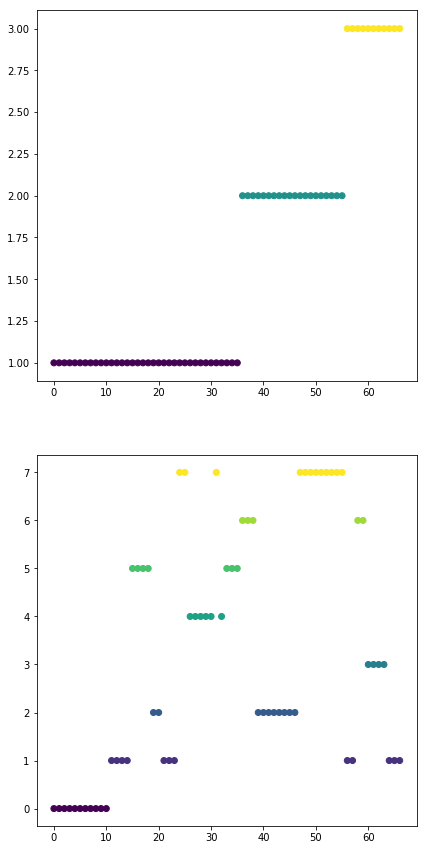

In [685]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y_kmeans, c=y_kmeans, cmap=plt.viridis())
plt.show()

In [686]:
newlist = []

for item in y_kmeans:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 1      
    elif item == 2  :
        item = 2
    elif item == 3  :
        item = 3
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 1
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 2      

        #print(item)
    newlist.append(item)
newlist;
#y_kmeans
accuracyxw= accuracy_score(yp,newlist)
accuracyxw

0.7761194029850746

In [699]:
kmeans = KMeans(n_clusters=8, n_init=12, tol=1e-20) ##tool default 1e-4


kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
accuracyxw= accuracy_score(finalDf.Permanencia,y_kmeans)
    
  

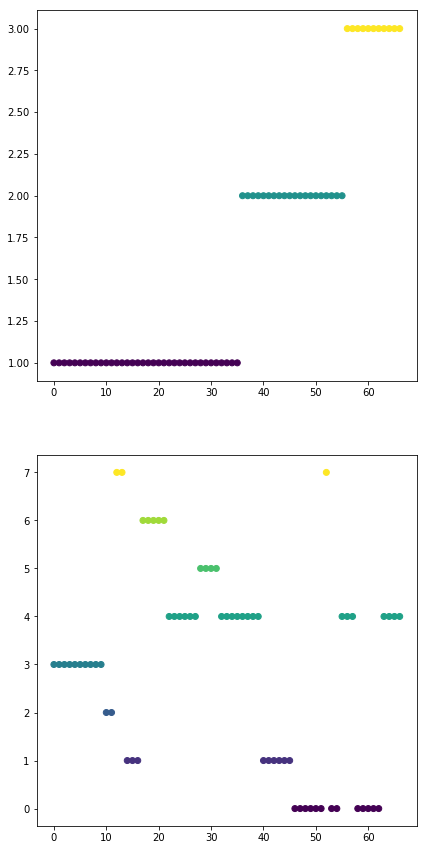

In [700]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y_kmeans, c=y_kmeans, cmap=plt.viridis())
plt.show()

In [90]:
from sklearn.cluster import KMeans  ##training with Factor data

kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-8) ##tool default 1e-4

accuracyF=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalf)
    y_kmeans = kmeans.predict(principalf)
    accuracyF[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
accuracyF   

array([0.        , 0.32835821, 0.35820896, 0.37313433, 0.35820896,
       0.56716418, 0.32835821, 0.19402985, 0.04477612, 0.35820896,
       0.19402985, 0.26865672, 0.10447761, 0.37313433, 0.56716418,
       0.3880597 , 0.40298507, 0.35820896, 0.19402985, 0.08955224])

In [91]:
accuracyyt

array([0.        , 0.1641791 , 0.20895522, 0.08955224, 0.20895522,
       0.35820896, 0.1641791 , 0.6119403 , 0.40298507, 0.20895522,
       0.6119403 , 0.70149254, 0.47761194, 0.05970149, 0.35820896,
       0.10447761, 0.35820896, 0.20895522, 0.6119403 , 0.52238806])

# Spectral Clustering

In [472]:

from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import homogeneity_score

accuracyS=np.zeros(20)
accuracyyt=np.zeros(20)
accmoreclus=np.zeros(20)


for i in range(1, 20):
    model = SpectralClustering(n_clusters=8, affinity='nearest_neighbors',
                           assign_labels='kmeans', n_init=20)
    labels = model.fit_predict(scalx)
    accuracyS[i]= accuracy_score(labels,finalf.target)
    accuracyyt[i]= accuracy_score(labels,yt)
    accmoreclus[i]=homogeneity_score(labels,yt)

accuracyS
   

array([0.        , 0.23880597, 0.17910448, 0.05970149, 0.23880597,
       0.19402985, 0.01492537, 0.        , 0.01492537, 0.17910448,
       0.11940299, 0.14925373, 0.04477612, 0.        , 0.        ,
       0.10447761, 0.04477612, 0.14925373, 0.04477612, 0.10447761])

In [473]:
    accuracyyt



array([0.        , 0.1641791 , 0.17910448, 0.23880597, 0.        ,
       0.14925373, 0.2238806 , 0.14925373, 0.14925373, 0.        ,
       0.08955224, 0.37313433, 0.        , 0.10447761, 0.26865672,
       0.        , 0.08955224, 0.        , 0.13432836, 0.        ])

In [474]:
accmoreclus

array([0.        , 0.42679162, 0.42686474, 0.42679162, 0.41098226,
       0.41098226, 0.42686474, 0.42686474, 0.42679162, 0.42679162,
       0.42679162, 0.42686474, 0.42686474, 0.42686474, 0.42686474,
       0.42686474, 0.42686474, 0.42686474, 0.42686474, 0.41098226])

Prueba


In [426]:

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels=model.fit_predict(pruebaw)
accuracy_score(labels,ypruebaT)

0.5

# GMM 

In [617]:


from sklearn.mixture import GaussianMixture as GMM

accuracyGMM=np.zeros(20)
accuracyGMMyt=np.zeros(20)
for i in range(1, 20):
    gmm = GMM(n_components=3).fit(principalf)
    labels = gmm.predict(principalf)
    accuracyGMM[i]=accuracy_score(finalf.target,labels)
    accuracyGMMyt[i]=accuracy_score(yt,labels)


accuracyGMM


array([0.        , 0.50746269, 0.26865672, 0.35820896, 0.11940299,
       0.58208955, 0.3880597 , 0.49253731, 0.26865672, 0.23880597,
       0.25373134, 0.11940299, 0.25373134, 0.46268657, 0.14925373,
       0.2238806 , 0.07462687, 0.13432836, 0.52238806, 0.31343284])

In [618]:
accuracyGMMyt



array([0.        , 0.44776119, 0.50746269, 0.04477612, 0.49253731,
       0.53731343, 0.01492537, 0.50746269, 0.31343284, 0.52238806,
       0.52238806, 0.49253731, 0.6119403 , 0.37313433, 0.46268657,
       0.67164179, 0.40298507, 0.40298507, 0.35820896, 0.05970149])

# GMMHMMM 

Se hace la prueba con los datos de transformation y permanencia, entrenando con los datos optenidos por pca

In [622]:

##con permanencia 
from hmmlearn import hmm
Amgmm=np.zeros((5,10))
Amgmmyt=np.zeros((5,10))
for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=3,n_mix=i) 
        modelhm.fit(principalf)
        labels = modelhm.predict(principalf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(finalf.target,labels) 
        Amgmmyt[i,j]=accuracy_score(yt,labels) 


Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.37313433, 0.11940299, 0.50746269, 0.11940299,
        0.26865672, 0.37313433, 0.37313433, 0.11940299, 0.19402985],
       [0.        , 0.08955224, 0.56716418, 0.28358209, 0.40298507,
        0.34328358, 0.56716418, 0.2238806 , 0.56716418, 0.56716418],
       [0.        , 0.34328358, 0.59701493, 0.35820896, 0.35820896,
        0.37313433, 0.04477612, 0.59701493, 0.35820896, 0.59701493],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Maximo accuracy se optiene en varios casos de 0.5

In [49]:
Amgmmyt



array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.20895522, 0.40298507, 0.3880597 , 0.49253731,
        0.3880597 , 0.41791045, 0.6119403 , 0.35820896, 0.3880597 ],
       [0.        , 0.20895522, 0.55223881, 0.08955224, 0.3880597 ,
        0.        , 0.32835821, 0.50746269, 0.08955224, 0.32835821],
       [0.        , 0.67164179, 0.58208955, 0.43283582, 0.58208955,
        0.20895522, 0.3880597 , 0.08955224, 0.44776119, 0.67164179],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [628]:
#con transformaci, entrenando con factor analisis 

Amgmm=np.zeros((5,10))
Amgmmyt=np.zeros((5,10))

for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=i,n_mix=3) 
        modelhm.fit(principalf)
        labels = modelhm.predict(principalf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(finalf.target,labels) 
        Amgmmyt[i,j]=accuracy_score(yt,labels) 
Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.29850746, 0.29850746, 0.29850746, 0.29850746,
        0.29850746, 0.29850746, 0.29850746, 0.29850746, 0.29850746],
       [0.        , 0.10447761, 0.37313433, 0.10447761, 0.04477612,
        0.41791045, 0.37313433, 0.10447761, 0.41791045, 0.04477612],
       [0.        , 0.2238806 , 0.53731343, 0.37313433, 0.26865672,
        0.34328358, 0.59701493, 0.35820896, 0.34328358, 0.37313433],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [629]:
Amgmmyt

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35820896, 0.35820896, 0.35820896, 0.35820896,
        0.35820896, 0.35820896, 0.35820896, 0.35820896, 0.35820896],
       [0.        , 0.40298507, 0.31343284, 0.40298507, 0.46268657,
        0.20895522, 0.31343284, 0.40298507, 0.20895522, 0.46268657],
       [0.        , 0.64179104, 0.46268657, 0.08955224, 0.70149254,
        0.35820896, 0.3880597 , 0.20895522, 0.41791045, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

en el numero de estados en GMM n_mix=2, con el numero de componentes n_components=6 se 
tiene accuracy de 0.72
nmix=3,ncomponents=2, se tiene un accuracy de 0.77



In [646]:
#Entrenando con PCA

Amgmm=np.zeros((5,10))
for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=3,n_mix=i) 
        modelhm.fit(principalDf)
        labels = modelhm.predict(principalDf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(finalf.target,labels) 
        Amgmmyt[i,j]=accuracy_score(yt,labels)  


Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.25373134, 0.25373134, 0.50746269, 0.50746269,
        0.37313433, 0.50746269, 0.31343284, 0.17910448, 0.37313433],
       [0.        , 0.35820896, 0.53731343, 0.43283582, 0.35820896,
        0.1641791 , 0.28358209, 0.53731343, 0.28358209, 0.35820896],
       [0.        , 0.20895522, 0.20895522, 0.59701493, 0.53731343,
        0.53731343, 0.28358209, 0.40298507, 0.53731343, 0.53731343],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [647]:
Amgmmyt

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.55223881, 0.55223881, 0.41791045, 0.41791045,
        0.44776119, 0.41791045, 0.08955224, 0.49253731, 0.44776119],
       [0.        , 0.01492537, 0.46268657, 0.        , 0.01492537,
        0.44776119, 0.56716418, 0.46268657, 0.56716418, 0.41791045],
       [0.        , 0.40298507, 0.40298507, 0.3880597 , 0.50746269,
        0.50746269, 0.52238806, 0.41791045, 0.50746269, 0.50746269],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [51]:
##con permanencia 
from hmmlearn import hmm

modelhm=hmm.GMMHMM(n_components=7,n_mix=2) 
modelhm.fit(scalx)
labels = modelhm.predict(scalx)
#        gmm = GMM(n_components=j).fit(principalf)
#       labels = gmm.predict(principalf)



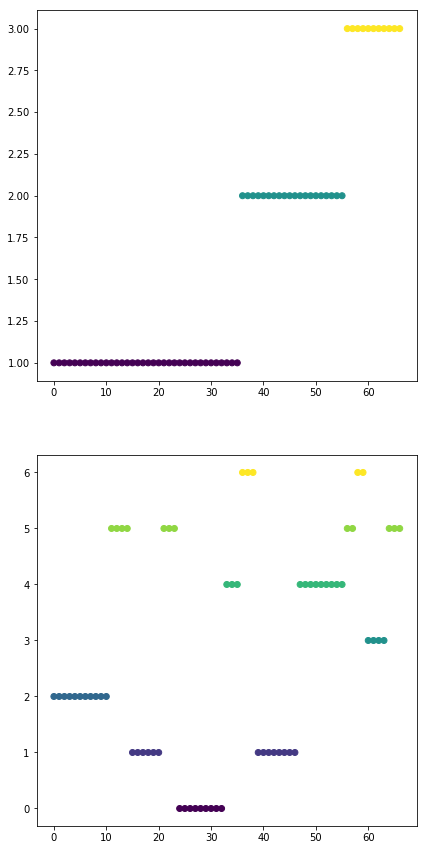

In [52]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(scalx.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [44]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 2
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 3
    elif item == 5  :
        item = 1    
    elif item == 6  :
        item = 2
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)

0.7611940298507462

0.3888888888888889


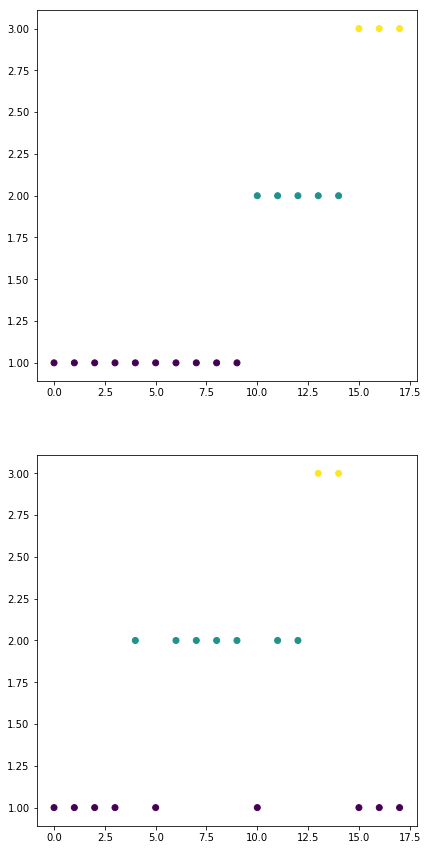

In [56]:
#prueba 


labels = modelhm.predict(prueba)


newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 2
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 3
    elif item == 5  :
        item = 1    
    elif item == 6  :
        item = 2
        #print(item)
    newlist.append(item)
newlist;
print(accuracy_score(ypruebaP,newlist))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(prueba.shape[0])
y=yp

img = ax.scatter(x, ypruebaP, c=ypruebaP, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, newlist, c=newlist, cmap=plt.viridis())
plt.show()

 # Fuzzy cmeans

In [55]:


from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=scalx.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

In [56]:
df2 = pd.DataFrame(u.transpose(), columns=['C1', 'C2', 'C3'])
df2['permanence']=finalf.target
df2['Transformation']=yt
df2;

In [57]:
cntr, U, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=principalDf.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

In [58]:
U[:,47]
U[1]

array([0.04700517, 0.02193703, 0.01645991, 0.03423329, 0.01042839,
       0.00464632, 0.01505356, 0.01758183, 0.03381339, 0.0362477 ,
       0.25978963, 0.31304019, 0.74259157, 0.8487019 , 0.70745706,
       0.70603407, 0.63264391, 0.8973346 , 0.89397342, 0.88024683,
       0.75351097, 0.75918764, 0.03762546, 0.03152006, 0.04158478,
       0.08123107, 0.0714777 , 0.06954886, 0.42694748, 0.3630371 ,
       0.32548207, 0.36077279, 0.03176823, 0.09280096, 0.11217433,
       0.05068956, 0.05995211, 0.04498406, 0.05571332, 0.03315608,
       0.95033342, 0.94993513, 0.90886335, 0.93266436, 0.95665597,
       0.87104686, 0.25596442, 0.11920909, 0.16488243, 0.25111327,
       0.25532283, 0.53523676, 0.44566713, 0.09356038, 0.18664807,
       0.08512575, 0.08392293, 0.06998489, 0.06989793, 0.05453675,
       0.05780065, 0.04918476, 0.04997483, 0.00659578, 0.02168515,
       0.03457095, 0.01056496])

In [59]:
udes=np.argmax(U,axis=0)
accuracy_score(udes,finalf.target)



0.3582089552238806

In [253]:
df2 = pd.DataFrame(U.transpose(), columns=['C1', 'C2', 'C3'])
df2['permanence']=finalf.target
df2['Transformation']=yt
df2;

gk means: https://pure.tue.nl/ws/portalfiles/portal/3635433/Metis256338.pdf
https://github.com/ITE-5th/fuzzy-clustering/blob/master/algorithms/gk.py
http://w3.ualg.pt/~jvo/ml2015-16/ml2015-16L17.pdf

In [61]:
udes=np.argmax(U,axis=0)
udes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [62]:
trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in udes]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(udes,finalf.target)


0.3582089552238806

In [64]:
print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))


0.3582089552238806
0.2835820895522388
0.26865671641791045
0.16417910447761194
0.373134328358209
0.5522388059701493


# GKMEANS

In [301]:
import numpy as np
from scipy.linalg import norm


class GK:
    def __init__(self, n_clusters=4, max_iter=100, m=2, error=1e-6, epsil=1):
        super().__init__()
        self.u, self.centers, self.f = None, None, None
        self.clusters_count = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error
        self.epsil = epsil

    def fit(self, z):
        N = z.shape[0]
        C = self.clusters_count
        centers = []

        u = np.random.dirichlet(np.ones(N), size=C)

        iteration = 0
        while iteration < self.max_iter:
            u2 = u.copy()

            centers = self.next_centers(z, u)
            f,numerator,v = self._covariance(z, centers, u)
            dist = self._distance(z, centers, f)
            u = self.next_u(dist)
            iteration += 1

            # Stopping rule
            if norm(u - u2) < self.error:
                break

        self.f = f
        self.u = u
        self.centers = centers
        return centers, f, u ,numerator,v

    def next_centers(self, z, u):
        um = u ** self.m
        return ((um @ z).T / um.sum(axis=1)).T

    def _covariance(self, z, v, u):
        um = u ** self.m

        denominator = um.sum(axis=1).reshape(-1, 1, 1)
        temp = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        temp = np.matmul(temp, temp.transpose((0, 1, 3, 2)))
        numerator = um.transpose().reshape(um.shape[1], um.shape[0], 1, 1) * temp
        numerator = numerator.sum(0)

        return numerator / denominator, numerator ,v

    def _distance(self, z, v, f):
        epsil=self.epsil
        dif = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        determ = np.power(np.linalg.det(f), 1 / self.m)
        det_time_inv = determ.reshape(-1, 1, 1) * np.linalg.pinv(f)
        temp = epsil*np.matmul(dif.transpose((0, 1, 3, 2)), det_time_inv)
        output = np.matmul(temp, dif).squeeze().T
        return np.fmax(output, 1e-8)

    def next_u(self, d):
        power = float(1 / (self.m - 1))
        d = d.transpose()
        denominator_ = d.reshape((d.shape[0], 1, -1)).repeat(d.shape[-1], axis=1)
        denominator_ = np.power(d[:, None, :] / denominator_.transpose((0, 2, 1)), power)
        denominator_ = 1 / denominator_.sum(1)
        denominator_ = denominator_.transpose()

        return denominator_

    def predict(self, z):
        if len(z.shape) == 1:
            z = np.expand_dims(z, axis=0)

        dist = self._distance(z, self.centers, self.f)
        if len(dist.shape) == 1:
            dist = np.expand_dims(dist, axis=0)

        u = self.next_u(dist)
        return np.argmax(u, axis=0)

In [302]:
principalDf.transpose()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-1.626040,-2.142818,-2.318485,-4.342542,-3.013076,-2.980487,-3.247970,-3.769576,-4.217164,-4.239861,...,-3.214686,-0.442219,-0.556252,-0.647460,-0.684716,-0.593590,-1.962257,-1.995658,-2.057653,-1.882279
1,3.766856,4.237366,4.541456,4.633429,4.377018,3.809791,4.283453,4.256396,4.426925,4.174272,...,-1.349219,-1.057791,-1.096235,-0.999439,-0.938881,-1.178780,-1.194080,-1.882638,-0.699936,-1.918666
2,-0.222426,0.211681,0.797331,0.760697,0.571460,0.614005,1.206391,0.522535,1.474685,1.339593,...,-1.967809,-0.817960,-0.621369,-1.001402,-0.526678,-0.644897,-0.022681,0.481348,-0.342110,-0.649603
3,0.191408,0.018135,0.444994,0.051816,0.143864,0.878736,1.216067,1.110624,1.345153,1.772283,...,-1.481292,0.624346,0.342245,0.370572,0.737434,0.641763,-0.371769,-0.306329,-0.881400,-0.415894


In [316]:
z=X
z.reshape(z.shape[0], 1, -1);


In [317]:
gk_centers,f,u ,numerator,v = gk.fit(X)
gk_centers

v

array([[-1.54661665, -1.47965142, -0.55519951,  0.00560857],
       [-2.35879139,  3.35482365,  0.40088218,  0.76972851],
       [ 3.68270379, -0.23060313,  1.50844735, -0.67080952]])

In [345]:
gk.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0])

In [422]:
X=principalDf
X=X.values
MAX_ITER = 500
m = 2.5
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m=2.5,epsil=2)
gk_centers,f,u ,numerator,v = gk.fit(X)
gk.predict(X)

trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in gk.predict(X)]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

In [423]:
print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))

0.3582089552238806
0.22388059701492538
0.2537313432835821
0.6119402985074627
0.43283582089552236
0.16417910447761194


In [321]:
accuracy_score(gk.predict(X),finalf.target)



0.34328358208955223

In [322]:
## GKmeans vairando m=3, epsil=1

X=principalDfwitouliers
X=X.values
MAX_ITER = 500
m = 2
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m=3)
gk_centers,f,u ,numerator,v = gk.fit(X)

gk.predict(X)

trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in gk.predict(X)]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))

0.3582089552238806
0.19402985074626866
0.208955223880597
0.417910447761194
0.6417910447761194
0.3880597014925373


In [74]:

u = np.random.dirichlet(np.ones(48), size=2)



In [75]:
X=principalf
X=X.values
MAX_ITER = 500
m = 2
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m)

In [76]:
gk_centers,f,u ,numerator,v = gk.fit(X)
gk_centers

array([[ 1.05820154,  0.06238929,  0.29130595, -0.01611619],
       [-0.39783251, -0.22467677, -0.63375593, -0.02226472],
       [-1.07842893,  1.05843289,  1.41678558,  0.06969288]])

In [77]:
gk.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0])

In [78]:
X[1:4]

array([[ 1.46545989,  1.04760108, -0.12480341, -0.28827174],
       [ 1.75950588,  1.40665553,  0.07089084, -0.03624911],
       [ 2.1108628 ,  1.04354552,  0.33243401, -0.48866078]])

In [79]:
trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in gk.predict(X)]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

In [80]:
print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))

0.3582089552238806
0.13432835820895522
0.417910447761194
0.5373134328358209
0.3582089552238806
0.3283582089552239


In [81]:
scalx.describe()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
count,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,...,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01
mean,-3.811213e-17,-8.885927e-17,6.131082e-17,2.485574e-18,-6.876755e-17,2.982689e-17,5.820386e-17,3.314099e-18,-1.325639e-17,1.118508e-16,...,-9.942296e-18,3.314099e-18,1.325639e-17,9.942296e-18,9.942296e-18,2.982689e-17,-3.894066e-17,7.021746e-17,-1.213789e-16,-8.368099e-17
std,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,...,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00
min,-3.335796e+00,-2.236856e+00,-2.770563e+00,-2.725485e+00,-2.118335e+00,-2.496026e+00,-2.867896e+00,-1.206569e+00,-1.123749e+00,-1.023418e+00,...,-3.051444e+00,-1.684658e+00,-1.790588e+00,-1.769145e+00,-2.508388e+00,-2.388758e+00,-1.906229e+00,-2.247475e+00,-2.563572e+00,-2.604525e+00
25%,-5.929526e-01,-7.295883e-01,-6.220192e-01,-4.859528e-01,-8.817025e-01,-7.405279e-01,-4.549809e-01,-7.259475e-01,-9.025846e-01,-6.271988e-01,...,-5.812392e-01,-7.482315e-01,-8.025162e-01,-7.031216e-01,-4.980758e-01,-5.699186e-01,-5.871919e-01,-5.250921e-01,-4.130259e-01,-2.689898e-01
50%,-3.148733e-01,2.194860e-02,-2.208257e-01,5.208673e-02,1.433623e-01,2.201303e-01,1.724975e-01,-1.618713e-01,-6.022056e-01,-2.294075e-01,...,-1.854927e-01,-3.512469e-01,1.041029e-01,-1.966393e-01,-7.875495e-02,-1.461574e-01,-3.860680e-02,6.964812e-02,1.510674e-01,2.931942e-01
75%,7.185719e-01,7.289022e-01,7.784809e-01,5.406953e-01,9.421461e-01,6.205603e-01,6.954813e-01,2.314138e-01,1.113943e+00,2.701525e-01,...,8.778380e-01,6.783012e-01,6.125900e-01,3.309660e-01,2.491831e-01,4.484319e-01,5.108817e-01,7.016573e-01,6.584579e-01,6.369255e-01
max,2.519023e+00,2.011568e+00,2.040302e+00,2.687175e+00,1.218219e+00,2.091998e+00,2.268441e+00,3.050732e+00,1.747798e+00,3.344773e+00,...,1.853238e+00,2.193147e+00,2.024664e+00,2.554541e+00,2.318110e+00,2.209619e+00,2.467857e+00,1.882630e+00,1.560193e+00,1.369448e+00


In [3]:
# -*- coding: utf-8 -*-
"""Algorithms for spectral clustering"""

# Author: Gael Varoquaux gael.varoquaux@normalesup.org
#         Brian Cheung
#         Wei LI <kuantkid@gmail.com>
# License: BSD 3 clause
import warnings
import numpy as n 
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_random_state, as_float_array
from sklearn.utils.validation import check_array
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import spectral_embedding
from sklearn.cluster.k_means_ import k_means


def discretize(vectors, copy=True, max_svd_restarts=30, n_iter_max=20,
               random_state=None):
    """Search for a partition matrix (clustering) which is closest to the
    eigenvector embedding.
    Parameters
    ----------
    vectors : array-like, shape: (n_samples, n_clusters)
        The embedding space of the samples.
    copy : boolean, optional, default: True
        Whether to copy vectors, or perform in-place normalization.
    max_svd_restarts : int, optional, default: 30
        Maximum number of attempts to restart SVD if convergence fails
    n_iter_max : int, optional, default: 30
        Maximum number of iterations to attempt in rotation and partition
        matrix search if machine precision convergence is not reached
    random_state : int, RandomState instance or None (default)
        Determines random number generation for rotation matrix initialization.
        Use an int to make the randomness deterministic.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    labels : array of integers, shape: n_samples
        The labels of the clusters.
    References
    ----------
    - Multiclass spectral clustering, 2003
      Stella X. Yu, Jianbo Shi
      https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf
    Notes
    -----
    The eigenvector embedding is used to iteratively search for the
    closest discrete partition.  First, the eigenvector embedding is
    normalized to the space of partition matrices. An optimal discrete
    partition matrix closest to this normalized embedding multiplied by
    an initial rotation is calculated.  Fixing this discrete partition
    matrix, an optimal rotation matrix is calculated.  These two
    calculations are performed until convergence.  The discrete partition
    matrix is returned as the clustering solution.  Used in spectral
    clustering, this method tends to be faster and more robust to random
    initialization than k-means.
    """

    from scipy.sparse import csc_matrix
    from scipy.linalg import LinAlgError

    random_state = check_random_state(random_state)

    vectors = as_float_array(vectors, copy=copy)

    eps = np.finfo(float).eps
    n_samples, n_components = vectors.shape

    # Normalize the eigenvectors to an equal length of a vector of ones.
    # Reorient the eigenvectors to point in the negative direction with respect
    # to the first element.  This may have to do with constraining the
    # eigenvectors to lie in a specific quadrant to make the discretization
    # search easier.
    norm_ones = np.sqrt(n_samples)
    for i in range(vectors.shape[1]):
        vectors[:, i] = (vectors[:, i] / np.linalg.norm(vectors[:, i])) \
            * norm_ones
        if vectors[0, i] != 0:
            vectors[:, i] = -1 * vectors[:, i] * np.sign(vectors[0, i])

    # Normalize the rows of the eigenvectors.  Samples should lie on the unit
    # hypersphere centered at the origin.  This transforms the samples in the
    # embedding space to the space of partition matrices.
    vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]

    svd_restarts = 0
    has_converged = False

    # If there is an exception we try to randomize and rerun SVD again
    # do this max_svd_restarts times.
    while (svd_restarts < max_svd_restarts) and not has_converged:

        # Initialize first column of rotation matrix with a row of the
        # eigenvectors
        rotation = np.zeros((n_components, n_components))
        rotation[:, 0] = vectors[random_state.randint(n_samples), :].T

        # To initialize the rest of the rotation matrix, find the rows
        # of the eigenvectors that are as orthogonal to each other as
        # possible
        c = np.zeros(n_samples)
        for j in range(1, n_components):
            # Accumulate c to ensure row is as orthogonal as possible to
            # previous picks as well as current one
            c += np.abs(np.dot(vectors, rotation[:, j - 1]))
            rotation[:, j] = vectors[c.argmin(), :].T

        last_objective_value = 0.0
        n_iter = 0

        while not has_converged:
            n_iter += 1

            t_discrete = np.dot(vectors, rotation)

            labels = t_discrete.argmax(axis=1)
            vectors_discrete = csc_matrix(
                (np.ones(len(labels)), (np.arange(0, n_samples), labels)),
                shape=(n_samples, n_components))

            t_svd = vectors_discrete.T * vectors

            try:
                U, S, Vh = np.linalg.svd(t_svd)
                svd_restarts += 1
            except LinAlgError:
                print("SVD did not converge, randomizing and trying again")
                break

            ncut_value = 2.0 * (n_samples - S.sum())
            if ((abs(ncut_value - last_objective_value) < eps) or
                    (n_iter > n_iter_max)):
                has_converged = True
            else:
                # otherwise calculate rotation and continue
                last_objective_value = ncut_value
                rotation = np.dot(Vh.T, U.T)

    if not has_converged:
        raise LinAlgError('SVD did not converge')
    return labels


def spectral_clustering(affinity, n_clusters=8, n_components=None,
                        eigen_solver=None, random_state=None, n_init=10,
                        eigen_tol=0.0, assign_labels='kmeans'):
    """Apply clustering to a projection of the normalized Laplacian.
    In practice Spectral Clustering is very useful when the structure of
    the individual clusters is highly non-convex or more generally when
    a measure of the center and spread of the cluster is not a suitable
    description of the complete cluster. For instance, when clusters are
    nested circles on the 2D plane.
    If affinity is the adjacency matrix of a graph, this method can be
    used to find normalized graph cuts.
    Read more in the :ref:`User Guide <spectral_clustering>`.
    Parameters
    ----------
    affinity : array-like or sparse matrix, shape: (n_samples, n_samples)
        The affinity matrix describing the relationship of the samples to
        embed. **Must be symmetric**.
        Possible examples:
          - adjacency matrix of a graph,
          - heat kernel of the pairwise distance matrix of the samples,
          - symmetric k-nearest neighbours connectivity matrix of the samples.
    n_clusters : integer, optional
        Number of clusters to extract.
    n_components : integer, optional, default is n_clusters
        Number of eigen vectors to use for the spectral embedding
    eigen_solver : {None, 'arpack', 'lobpcg', or 'amg'}
        The eigenvalue decomposition strategy to use. AMG requires pyamg
        to be installed. It can be faster on very large, sparse problems,
        but may also lead to instabilities
    random_state : int, RandomState instance or None (default)
        A pseudo random number generator used for the initialization of the
        lobpcg eigen vectors decomposition when eigen_solver == 'amg' and by
        the K-Means initialization. Use an int to make the randomness
        deterministic.
        See :term:`Glossary <random_state>`.
    n_init : int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    eigen_tol : float, optional, default: 0.0
        Stopping criterion for eigendecomposition of the Laplacian matrix
        when using arpack eigen_solver.
    assign_labels : {'kmeans', 'discretize'}, default: 'kmeans'
        The strategy to use to assign labels in the embedding
        space.  There are two ways to assign labels after the laplacian
        embedding.  k-means can be applied and is a popular choice. But it can
        also be sensitive to initialization. Discretization is another
        approach which is less sensitive to random initialization. See
        the 'Multiclass spectral clustering' paper referenced below for
        more details on the discretization approach.
    Returns
    -------
    labels : array of integers, shape: n_samples
        The labels of the clusters.
    References
    ----------
    - Normalized cuts and image segmentation, 2000
      Jianbo Shi, Jitendra Malik
      http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.160.2324
    - A Tutorial on Spectral Clustering, 2007
      Ulrike von Luxburg
      http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    - Multiclass spectral clustering, 2003
      Stella X. Yu, Jianbo Shi
      https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf
    Notes
    -----
    The graph should contain only one connect component, elsewhere
    the results make little sense.
    This algorithm solves the normalized cut for k=2: it is a
    normalized spectral clustering.
    """
    if assign_labels not in ('kmeans', 'discretize'):
        raise ValueError("The 'assign_labels' parameter should be "
                         "'kmeans' or 'discretize', but '%s' was given"
                         % assign_labels)

    random_state = check_random_state(random_state)
    n_components = n_clusters if n_components is None else n_components

    # The first eigen vector is constant only for fully connected graphs
    # and should be kept for spectral clustering (drop_first = False)
    # See spectral_embedding documentation.
    maps = spectral_embedding(affinity, n_components=n_components,
                              eigen_solver=eigen_solver,
                              random_state=random_state,
                              eigen_tol=eigen_tol, drop_first=False)

    if assign_labels == 'kmeans':
        _, labels, _ = k_means(maps, n_clusters, random_state=random_state,
                               n_init=n_init)
    else:
        labels = discretize(maps, random_state=random_state)

    return labels,maps


class SpectralClustering(BaseEstimator, ClusterMixin):
    """Apply clustering to a projection of the normalized Laplacian.
    In practice Spectral Clustering is very useful when the structure of
    the individual clusters is highly non-convex or more generally when
    a measure of the center and spread of the cluster is not a suitable
    description of the complete cluster. For instance when clusters are
    nested circles on the 2D plane.
    If affinity is the adjacency matrix of a graph, this method can be
    used to find normalized graph cuts.
    When calling ``fit``, an affinity matrix is constructed using either
    kernel function such the Gaussian (aka RBF) kernel of the euclidean
    distanced ``d(X, X)``::
            np.exp(-gamma * d(X,X) ** 2)
    or a k-nearest neighbors connectivity matrix.
    Alternatively, using ``precomputed``, a user-provided affinity
    matrix can be used.
    Read more in the :ref:`User Guide <spectral_clustering>`.
    Parameters
    ----------
    n_clusters : integer, optional
        The dimension of the projection subspace.
    eigen_solver : {None, 'arpack', 'lobpcg', or 'amg'}
        The eigenvalue decomposition strategy to use. AMG requires pyamg
        to be installed. It can be faster on very large, sparse problems,
        but may also lead to instabilities.
    random_state : int, RandomState instance or None (default)
        A pseudo random number generator used for the initialization of the
        lobpcg eigen vectors decomposition when ``eigen_solver='amg'`` and by
        the K-Means initialization. Use an int to make the randomness
        deterministic.
        See :term:`Glossary <random_state>`.
    n_init : int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    gamma : float, default=1.0
        Kernel coefficient for rbf, poly, sigmoid, laplacian and chi2 kernels.
        Ignored for ``affinity='nearest_neighbors'``.
    affinity : string, array-like or callable, default 'rbf'
        If a string, this may be one of 'nearest_neighbors', 'precomputed',
        'rbf' or one of the kernels supported by
        `sklearn.metrics.pairwise_kernels`.
        Only kernels that produce similarity scores (non-negative values that
        increase with similarity) should be used. This property is not checked
        by the clustering algorithm.
    n_neighbors : integer
        Number of neighbors to use when constructing the affinity matrix using
        the nearest neighbors method. Ignored for ``affinity='rbf'``.
    eigen_tol : float, optional, default: 0.0
        Stopping criterion for eigendecomposition of the Laplacian matrix
        when ``eigen_solver='arpack'``.
    assign_labels : {'kmeans', 'discretize'}, default: 'kmeans'
        The strategy to use to assign labels in the embedding
        space. There are two ways to assign labels after the laplacian
        embedding. k-means can be applied and is a popular choice. But it can
        also be sensitive to initialization. Discretization is another approach
        which is less sensitive to random initialization.
    degree : float, default=3
        Degree of the polynomial kernel. Ignored by other kernels.
    coef0 : float, default=1
        Zero coefficient for polynomial and sigmoid kernels.
        Ignored by other kernels.
    kernel_params : dictionary of string to any, optional
        Parameters (keyword arguments) and values for kernel passed as
        callable object. Ignored by other kernels.
    n_jobs : int or None, optional (default=None)
        The number of parallel jobs to run.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    Attributes
    ----------
    affinity_matrix_ : array-like, shape (n_samples, n_samples)
        Affinity matrix used for clustering. Available only if after calling
        ``fit``.
    labels_ :
        Labels of each point
    Examples
    --------
    >>> from sklearn.cluster import SpectralClustering
    >>> import numpy as np
    >>> X = np.array([[1, 1], [2, 1], [1, 0],
    ...               [4, 7], [3, 5], [3, 6]])
    >>> clustering = SpectralClustering(n_clusters=2,
    ...         assign_labels="discretize",
    ...         random_state=0).fit(X)
    >>> clustering.labels_
    array([1, 1, 1, 0, 0, 0])
    >>> clustering # doctest: +NORMALIZE_WHITESPACE
    SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
              degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
              kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
              n_neighbors=10, random_state=0)
    Notes
    -----
    If you have an affinity matrix, such as a distance matrix,
    for which 0 means identical elements, and high values means
    very dissimilar elements, it can be transformed in a
    similarity matrix that is well suited for the algorithm by
    applying the Gaussian (RBF, heat) kernel::
        np.exp(- dist_matrix ** 2 / (2. * delta ** 2))
    Where ``delta`` is a free parameter representing the width of the Gaussian
    kernel.
    Another alternative is to take a symmetric version of the k
    nearest neighbors connectivity matrix of the points.
    If the pyamg package is installed, it is used: this greatly
    speeds up computation.
    References
    ----------
    - Normalized cuts and image segmentation, 2000
      Jianbo Shi, Jitendra Malik
      http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.160.2324
    - A Tutorial on Spectral Clustering, 2007
      Ulrike von Luxburg
      http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    - Multiclass spectral clustering, 2003
      Stella X. Yu, Jianbo Shi
      https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf
    """

    def __init__(self, n_clusters=8, eigen_solver=None, random_state=None,
                 n_init=10, gamma=1., affinity='rbf', n_neighbors=10,
                 eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1,
                 kernel_params=None, n_jobs=None):
        self.n_clusters = n_clusters
        self.eigen_solver = eigen_solver
        self.random_state = random_state
        self.n_init = n_init
        self.gamma = gamma
        self.affinity = affinity
        self.n_neighbors = n_neighbors
        self.eigen_tol = eigen_tol
        self.assign_labels = assign_labels
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.n_jobs = n_jobs
        self.maps=[]

    def fit(self, X, y=None):
        """Creates an affinity matrix for X using the selected affinity,
        then applies spectral clustering to this affinity matrix.
        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            OR, if affinity==`precomputed`, a precomputed affinity
            matrix of shape (n_samples, n_samples)
        y : Ignored
        """
        X = check_array(X, accept_sparse=['csr', 'csc', 'coo'],
                        dtype=np.float64, ensure_min_samples=2)
        if X.shape[0] == X.shape[1] and self.affinity != "precomputed":
            warnings.warn("The spectral clustering API has changed. ``fit``"
                          "now constructs an affinity matrix from data. To use"
                          " a custom affinity matrix, "
                          "set ``affinity=precomputed``.")

        if self.affinity == 'nearest_neighbors':
            connectivity = kneighbors_graph(X, n_neighbors=self.n_neighbors,
                                            include_self=True,
                                            n_jobs=self.n_jobs)
            self.affinity_matrix_ = 0.5 * (connectivity + connectivity.T)
        elif self.affinity == 'precomputed':
            self.affinity_matrix_ = X
        else:
            params = self.kernel_params
            if params is None:
                params = {}
            if not callable(self.affinity):
                params['gamma'] = self.gamma
                params['degree'] = self.degree
                params['coef0'] = self.coef0
            self.affinity_matrix_ = pairwise_kernels(X, metric=self.affinity,
                                                     filter_params=True,
                                                     **params)

        random_state = check_random_state(self.random_state)
        self.labels_ = spectral_clustering(self.affinity_matrix_,
                                           n_clusters=self.n_clusters,
                                           eigen_solver=self.eigen_solver,
                                           random_state=random_state,
                                           n_init=self.n_init,
                                           eigen_tol=self.eigen_tol,
                                           assign_labels=self.assign_labels)
        return self
    

    @property
    def _pairwise(self):
        return self.affinity == "precomputed"

In [4]:
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import homogeneity_score


#for i in range(1, 20):

x=dataprofe
model = SpectralClustering(n_clusters=12, n_init=10)


fitmodel= model.fit(x,yp)
#accuracyS= accuracy_score(yp,labels)
    #accuracyyt[i]= accuracy_score(labels,yt)
    #accmoreclus[i]=homogeneity_score(labels,yt)
#labels=fitmodel.fit_predict(dataprofe)
#accuracyS
aff=fitmodel.affinity_matrix_
labels=spectral_clustering(aff,n_clusters=12)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(x.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()


NameError: name 'dataprofe' is not defined